In [12]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words = 10000 – означает, что рассматриваться будут только 10000 самых популярных слов в отзывах

In [ ]:
import numpy as np  # импорт библиотеки NumPy с тензорами

# определение ф-ции векторизации
def vectorize_sequences(sequences: np.ndarray, dimension=10000) -> np.ndarray:
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results


x_train = vectorize_sequences(train_data)  # векторизация обучающих данных
x_test = vectorize_sequences(test_data)  # векторизация тестовых данных
# векторизация меток данных с вещественным типом
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [3]:
from keras import models  # импорт моделей
from keras import layers  # импорт слоев

# создание последовательной модели
model = models.Sequential()
# добавление слоев
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [4]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
30/30 [==============================] - 9s 270ms/step - loss: 0.5245 - accuracy: 0.7832 - val_loss: 0.3914 - val_accuracy: 0.8743
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3107 - accuracy: 0.9031 - val_loss: 0.3110 - val_accuracy: 0.8864
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2253 - accuracy: 0.9283 - val_loss: 0.2798 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1775 - accuracy: 0.9447 - val_loss: 0.2823 - val_accuracy: 0.8851
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1460 - accuracy: 0.9543 - val_loss: 0.2817 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1230 - accuracy: 0.9622 - val_loss: 0.3346 - val_accuracy: 0.8720
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1018 - accuracy: 0.9688 - val_loss: 0.3368 - val_accuracy: 0.8732
Epoch 8/20
3

In [7]:
history_dict = history.history
print(history_dict.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


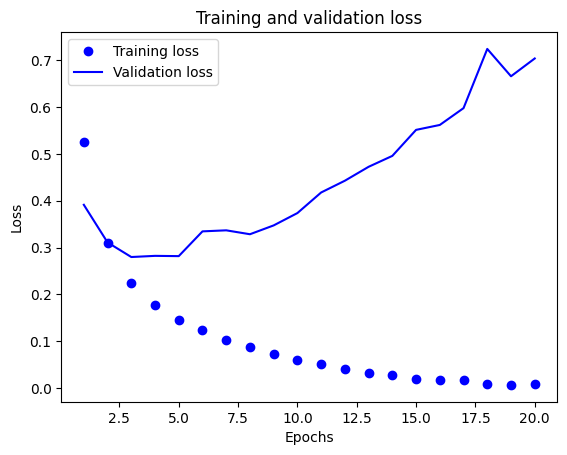

In [8]:
import matplotlib.pyplot as plt  # импорт модуля для графиков

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

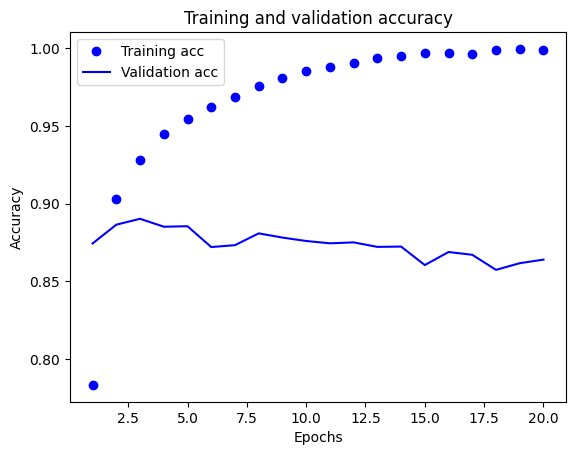

In [9]:
plt.clf()
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
model.evaluate(x_test, y_test)
# 25000/25000 [==============================] - 2s 79us/step
# [0.7763081940078735, 0.84952]

782/782 [==============================] - 2s 2ms/step - loss: 0.7633 - accuracy: 0.8518


[0.7632696628570557, 0.8517600297927856]

In [11]:
model.predict(x_test)
# array([[0.00725254],
# [0.9999999 ],
# [0.692512 ],
# ...,
# [0.00239742],
# [0.01149198],
# [0.6964724 ]], dtype=float32)

782/782 [==============================] - 2s 2ms/step


array([[0.01321542],
       [1.        ],
       [0.9960991 ],
       ...,
       [0.00336717],
       [0.03266694],
       [0.9574236 ]], dtype=float32)